# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Petrus Praditya Aswangga N.
- **Email:** ppradityaaa@gmail.com
- **ID Dicoding:** praditya_aswangga

## Tentang Dataset

**Bike Sharing Dataset** adalah catatan penyewaan sepeda per jam dan harian dari tahun 2011 hingga 2012 dari Capital Bikeshare.

**Kolom**:
- instant : baris indeks
- dteday : tanggal
- season : musim yang berlangsung
    + 1: Spring
    + 2: Summer
    + 3: Fall
    + 4: Winter
- yr :
    + 1: Tahun 2011
    + 2: Tahun 2012
- mnth : bulan
    + 1: Januari
    + ...
    + 12: Desember
- hr : jam (0 hingga 23)
- holiday : (extracted from http://dchr.dc.gov/page/holiday-schedule)
    + 1: Hari libur
    + 0: Bukan hari libur
- weekday :
    + 0: Minggu
    + ...
    + 6: Sabtu
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0
    + 1: Hari kerja (Bukan weekend/hari libur)
    + 0: hari libur
- weathersit : kondisi cuaca
    + 1: Cerah, Sedikit berawan, Sebagian berawan
    + 2: Kabut dan Berawan, Kabut dan Awan pecah-pecah, Kabut dan Sedikit berawan, Kabut
    + 3: Salju ringan, Hujan ringan dan Badai petir dan Awan tersebar, Hujan ringan dan Awan tersebar
    + 4: Hujan deras dan Hujan es dan Badai petir dan Kabut tipis, Salju dan Kabut
- temp : Suhu yang dinormalisasi dengan bagi 41 (suhu maksimal dalam Celsius). Misal 20 Celcius menjadi 0.49
- atemp : Apparent Temp. Suhu yang dirasakan manusia yang dinormalisasi dengan bagi 50 (suhu maksimal dalam Celsius)
- hum : Tingkat kelembapan yang dinormalisasi dengan bagi 100. Misal 60 (dalam persen) menjadi 0.6
- windspeed : Kecepatan angin yang dinormalisasi dengan bagi 67
- casual : jumlah penyewa non-membership
- registered : jumlah penyewa membership
- cnt : jumlah penyewa secara keseluruhan

## Menentukan Pertanyaan Bisnis

- Kapan peak season penggunaan sepeda?
- Kapan hari yang paling sibuk?
- Pada tanggal berapa penggunaan sepeda mencapai puncaknya?
- Kapan jam penyewaan tersibuk di setiap harinya?
- Kapan musim yang paling banyak pengguna?
- Apakah terdapat perbedaan jam sibuk di setiap musim?
- Apa perbedaan kebiasaan pengguna membership dan non-membership di hari kerja/hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Data Wrangling
**Key words**:
- Jumlah pengguna,
- Jenis pengguna,
- Jam sibuk,
- Tahunan,
- Musim,
- Suhu,
- Cuaca,
- Hari kerja.

### Gathering Data

**Ringkasan**:

- Pada dataset 'hour.csv' terdapat 17,379 baris data dan 16 kolom fitur
- Pada dataset 'day.csv' terdapat 731 baris data dan 15 kolom fitur
- Terdapat perbedaan 1 kolom fitur pada 2 dataset, yaitu: dataset 'day.csv' tidak memiliki kolom 'hour'
- Kolom 'dteday' masih dalam bentuk object, apabila diperlukan bisa diubah ke dalam datetime

**Mengimpor dataset 'hour.csv' dan mengambil ringkasan tentang data**

In [2]:
# Import 'hour.csv'
df_hour = pd.read_csv('Bike-sharing-dataset\hour.csv')
print('Data shape:', df_hour.shape)
df_hour.head()

Data shape: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Data summary 'hour.csv'
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Mengimpor dataset 'day.csv' dan mengambil ringkasan tentang data**

In [4]:
# Import 'day.csv'
df_day = pd.read_csv('Bike-sharing-dataset\day.csv')
print('Data shape:', df_day.shape)
df_day.head()

Data shape: (731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Data summary 'day.csv'
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Assessing Data

**Missing Values**

Setelah melakukan pengecekkan missing value, tidak ditemukan satupun missing value pada kedua dataset.

In [6]:
print("Missing values in 'hour.csv':")
print(df_hour.isna().sum())

Missing values in 'hour.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
print("Missing values in 'day.csv':")
print(df_day.isna().sum())

Missing values in 'day.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Duplicated Values**

Setelah melakukan pengecekkan, tidak ditemukan baris data yang terduplikat pada kedua dataset

In [8]:
# Checking duplicated rows
print("Duplicated rows in 'hour.csv':", df_hour.duplicated().sum())
print("Duplicated rows in 'day.csv':", df_day.duplicated().sum())

Duplicated rows in 'hour.csv': 0
Duplicated rows in 'day.csv': 0


**Innacurate Values**
- Informasi yang diberikan adalah windspeed dinormalisasi dengan dibagi oleh 67 sebagai nilai maksimal, tetapi nilai maksimal pada 'hour.csv' bukan 1 (harusnya value berkisar di antara 0 hingga 1)
- Variabel season menunjukkan kesalahan mapping. Terlihat ketidaksesuaian start date di setiap musimmnya, dalam hal ini saya merujuk pada website www.timeanddate.com

Melihat melalui statistik deskriptif value pada variabel numerik, terutama variabel yang dinormalisasi. Terlihat bahwa terdapat anomali pada nilai maksimal variabel windspeed yang bukan angka 1. Normalisasi yang diterapkan (membagi dengan nilai maksimal) seharusnya menghasilkan nilai di skala 0 hingga 1.

In [9]:
# Descriptive statistics 'hour.csv'
df_hour[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
# Descriptive statistics 'day.csv'
df_day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memeriksa ulang unique value pada kolom windspeed karena terdapat anomali di nilai maksimalnya. Normalisasi dengan pembagian oleh nilai maksimal seharusnya menghasilkan nilai di skala 0 untuk nilai terendah dan 1 untuk nilai tertinggi. Namun, tidak ditemukan nilai 1 pada kolom windspeed. Ini bisa disebabkan oleh human error saat melakukan normalisasi. Asumsi saya adalah kesalahan penulisan dalam memasukkan nilai maksimal

In [11]:
# Checking unique values in 'windspeed'
df_hour['windspeed'].unique()

array([0.    , 0.0896, 0.2537, 0.2836, 0.2985, 0.194 , 0.2239, 0.1343,
       0.1642, 0.3284, 0.4478, 0.3582, 0.4179, 0.3881, 0.1045, 0.4925,
       0.5522, 0.4627, 0.5224, 0.5821, 0.6567, 0.6119, 0.7761, 0.6866,
       0.7463, 0.6418, 0.806 , 0.8507, 0.8358, 0.7164])

Memeriksa apakah mapping musim pada dokumentasi sudah sesuai berdasarkan tanggal dan bulan setiap musimnya. Berdasarkan data yang didapatkan dari website www.timeanddate.com, mapping yang dijelaskan pada dokumentasi tidak sesuai. Bisa kita lihat bahwa Spring di mulai pada pertengahan bulan Maret tahun 2011, namun dari dataset yang kita miliki Spring dimulai pada tanggal 1 Januari. Contoh lain bisa kita lihat dari Summer yang seharusnya dimulai pada pertengahan Juni, tetapi pada dataset dimulai dari pertengahan Maret. Maka dari itu, kita akan melakukan mapping ulang sesuai data tambahan yang kita dapatkan dari www.timeanddate.com

Kolom secara berurutan Spring, Summer, Fall, Winter

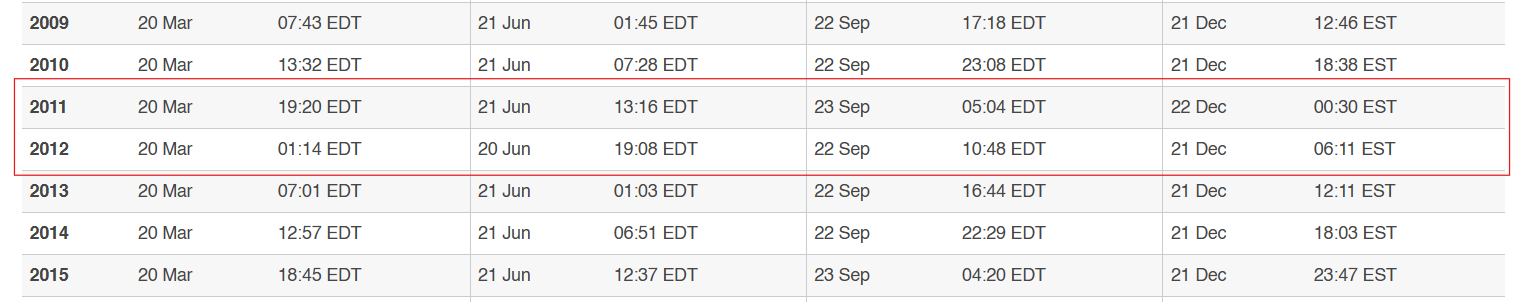

In [12]:
# Convert 'dteday' to datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Getting the start date of each season
df_day['year'] = df_day['dteday'].dt.year
df_season_start = df_day.groupby(['year', 'season'])['dteday'].min().reset_index()
df_season_start.columns = ['Year', 'Season', 'Start Date']
df_season_start['Season Name'] = df_season_start['Season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
columns = ['Year', 'Season Name', 'Season', 'Start Date']
df_season_start[columns]

,Year,Season Name,Season,Start Date
0,2011,Spring,1,2011-01-01
1,2011,Summer,2,2011-03-21
2,2011,Fall,3,2011-06-21
3,2011,Winter,4,2011-09-23
4,2012,Spring,1,2012-01-01
5,2012,Summer,2,2012-03-21
6,2012,Fall,3,2012-06-21
7,2012,Winter,4,2012-09-23


### Cleaning Data

Pada tahap Cleaning Data ini saya telah melakukan hal-hal berikut:
1. Melakukan rescaling terhadap value kolom 'windspeed' pada dataset 'hour.csv'
2. Memperbarui value kolom 'windspeed' pada dataset 'day.csv'
3. Melakukan reverse mapping terhadap value kolom 'sesason' dengan ketentuan (1:Winter, 2:Spring, 3:Summer, 4:Fall)
4. Melakukan reverse mapping terhadap kolom 'yr' dengan ketentuan (0:2011, 1:2012)
5. Melakukan reverse mapping terhadap kolom 'weekday' dengan ketentuan (0:Sun, 1:Mon, 2:Tue, ..., 6:Sat)
6. Melakukan reverse mapping terhadap value kolom 'weathersit' dengan ketentuan (1:Clear/Partly Cloudy, 2:Mist/Cloudy, 3:Light Rain/Light Snow, 4:Heavy Rain/Thunderstorm/Snowstorm)

**Rescale value kolom 'windspeed' pada dataset 'hour.csv'**

Setelah mengembalikan value ke dalam skala original, ternyata nilai maksimal dari kolom 'windspeed' adalah 57. Ini bisa disebabkan oleh human error, yaitu kesalahan penulisan dalam dokumentasi sehingga berpengaruh terhadap normalisasi data yang dilakukan

In [13]:
# Rescale 'windspeed' in 'hour.csv' to original scale (multiply by 67)
df_hour['ori_windspeed'] = df_hour['windspeed'] * 67
df_hour['ori_windspeed'] = df_hour['ori_windspeed'].round(2)
df_hour['ori_windspeed'].max()

# Normalized 'ori_windspeed' in 'hour.csv' by dividing by the maximum value (57)
df_hour['fixed_windspeed'] = df_hour['ori_windspeed'] / df_hour['ori_windspeed'].max()

# Checking descriptive statistics of 'ori_windspeed'
df_hour[['windspeed', 'fixed_windspeed']].describe().T

,count,mean,std,min,25%,50%,75%,max
windspeed,17379.0,0.190098,0.122340,0.0,0.104500,0.19400,0.253700,0.8507
fixed_windspeed,17379.0,0.223443,0.143805,0.0,0.122807,0.22807,0.298246,1.0000


**Mengubah value 'windspeed' pada dataset 'day.csv' berdasarkan rata-rata yang sesuai**

Seperti yang kita ketahui, value dari variabel kontinyu pada dataset 'day.csv' merupakan nilai rata-rata per hari berdasarkan dataset 'hour.csv'

Pertama, kita akan melakukan pengecekkan apakah value dari 'windspeed' pada dataset 'day.csv' merupakan min/median/mean/max harian dari value 'windspeed' pada dataset 'hour.csv'. Ditemukan hasil bahwa value dari 'windspeed' pada dataset 'day.csv' merupakan nilai rata-rata dari value 'windspeed' harian pada dataset 'hour.csv'

In [14]:
# Daily min, median, mean, max of 'windspeed' in 'hour.csv'
df_check_windspeed = df_hour.groupby('dteday')['windspeed'].agg(['min', 'median', 'mean', 'max']).reset_index()
df_check_windspeed = pd.merge(df_check_windspeed, df_day[['dteday', 'windspeed']], on='dteday', how='outer')
df_check_windspeed

,dteday,min,median,mean,max,windspeed
0,2011-01-01,0.0000,0.23880,0.160446,0.2985,0.160446
1,2011-01-02,0.1343,0.22390,0.248539,0.4478,0.248539
2,2011-01-03,0.0000,0.26865,0.248309,0.4179,0.248309
3,2011-01-04,0.0000,0.13430,0.160296,0.3284,0.160296
4,2011-01-05,0.0000,0.19400,0.186900,0.3284,0.186900
...,...,...,...,...,...,...
726,2012-12-27,0.1642,0.31345,0.350133,0.5224,0.350133
727,2012-12-28,0.0000,0.13430,0.155471,0.2836,0.155471
728,2012-12-29,0.0000,0.08960,0.124383,0.5522,0.124383
729,2012-12-30,0.0000,0.34330,0.350754,0.6567,0.350754


Kedua, kita akan mengumpulkan nilai rata-rata 'windspeed' untuk setiap harinya menggunakan groupby ke dalam sebuah dataframe baru

In [15]:
# Getting the average 'windspeed' for each day in 'hour.csv'
df_windspeed_day = df_hour.groupby('dteday')['fixed_windspeed'].mean().reset_index()
df_hour.drop(['ori_windspeed', 'fixed_windspeed'], axis=1, inplace=True)
df_windspeed_day

,dteday,fixed_windspeed
0,2011-01-01,0.188596
1,2011-01-02,0.292143
2,2011-01-03,0.291866
3,2011-01-04,0.188406
4,2011-01-05,0.219680
...,...,...
726,2012-12-27,0.411550
727,2012-12-28,0.182749
728,2012-12-29,0.146199
729,2012-12-30,0.412281


Terakhir, kita akan mengganti value 'windspeed' pada dataset 'day.csv'

In [16]:
# Merge 'day.csv' with 'df_hour_windspeed'
df_day['windspeed'] = df_windspeed_day['fixed_windspeed']
print('Data shape:', df_day.shape)
df_day.head()

Data shape: (731, 17)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.188596,331,654,985,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.292143,131,670,801,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.291866,120,1229,1349,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.188406,108,1454,1562,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.219680,82,1518,1600,2011


In [17]:
# Descriptive statistics 'day.csv' after updated
df_day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.223899,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.091095,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.026316,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.158626,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.212719,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.274123,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.596491,3410.000000,6946.000000,8714.000000


**Reverse mapping kolom 'season'**

Melakukan reverse mapping terhadap value kolom 'sesason' dengan ketentuan (1: Winter, 2: Spring, 3: Summer, 4: Fall)

In [18]:
df_hour['season'] = df_hour['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
df_day['season'] = df_day['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Reverse mapping kolom 'yr'**

Melakukan reverse mapping terhadap value kolom 'sesason' dengan ketentuan (0: 2011, 1: 2012)

In [19]:
df_hour['yr'] = df_hour['yr'].map({0: 2011, 1: 2012})
df_day['yr'] = df_day['yr'].map({0: 2011, 1: 2012})
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Reverse mapping kolom 'weekday'**

Melakukan reverse mapping terhadap value kolom 'weekday' dengan ketentuan (0:Sun, 1:Mon, 2:Tue, ..., 6:Sat)

In [20]:
days_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
df_hour['weekday'] = df_hour['weekday'].map(days_mapping)
df_day['weekday'] = df_day['weekday'].map(days_mapping)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,0,Sat,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,0,Sat,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,0,Sat,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,0,Sat,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,0,Sat,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Reverse mapping kolom 'weathersit'**

Melakukan reverse mapping terhadap value kolom 'weekday' dengan ketentuan (1:Clear/Partly Cloudy, 2:Mist/Cloudy, 3:Light Rain/Light Snow, 4:Heavy Rain/Thunderstorm/Snowstorm)

In [21]:
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Light Snow',
    4: 'Heavy Rain/Thunderstorm/Snowstorm'
}

df_hour['weathersit'] = df_hour['weathersit'].map(weather_mapping)
df_day['weathersit'] = df_day['weathersit'].map(weather_mapping)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Hari

**Jumlah hari libur dan hari kerja**

In [22]:
df_day.groupby(['weekday'])['workingday'].value_counts().unstack().fillna(0).astype(int)

workingday,0,1
weekday,,
Fri,2,102
Mon,15,90
Sat,105,0
Sun,105,0
Thu,2,102
Tue,1,103
Wed,1,103


- Terdapat 231 hari libur dan 500 hari kerja
- Dalam tahun 2011 dan 2012, hanya terdapat 1 kali libur pada hari Selasa dan Rabu, dan 2 kali libur pada hari Kamis dan Jumat, dan 15 kali libur pada hari Senin.
- Hari Sabtu dan Minggu selalu menjadi hari libur.

**Hari tersibuk**

In [23]:
busiest_day = df_day.groupby(['weekday']).agg({
    'cnt': ['sum', 'mean', 'min', 'max']
}).reset_index().sort_values(('cnt', 'sum'), ascending=False)
busiest_day[('cnt', 'sum')] = busiest_day[('cnt', 'sum')].astype(int)
busiest_day[('cnt', 'mean')] = busiest_day[('cnt', 'mean')].astype(int)
busiest_day[('cnt', 'min')] = busiest_day[('cnt', 'min')].astype(int)
busiest_day[('cnt', 'max')] = busiest_day[('cnt', 'max')].astype(int)
busiest_day

weekday     cnt                  
              sum  mean   min   max
0     Fri  487790  4690  1167  8362
4     Thu  485395  4667   431  7804
2     Sat  477807  4550   627  8714
6     Wed  473048  4548   441  8173
5     Tue  469109  4510   683  7767
1     Mon  455503  4338    22  7525
3     Sun  444027  4228   605  8227

- Hari Jumat menjadi hari tersibuk dengan total 487.790 pengguna dan rata-rata 4.690 pengguna.
- Hari Jumat menjadi hari dengan minimal dan maksimal pengguna terbanyak. Pengguna terbanyak adalah di angka 1.167 dan terbanyak di angka 8.362

**Rata-rata pengguna perhari**

In [24]:
avg_user_day = df_hour.groupby(['dteday'])['cnt'].mean().reset_index()
avg_user_day['cnt'] = avg_user_day['cnt'].astype(int)
avg_user_day

,dteday,cnt
0,2011-01-01,41
1,2011-01-02,34
2,2011-01-03,61
3,2011-01-04,67
4,2011-01-05,69
...,...,...
726,2012-12-27,88
727,2012-12-28,128
728,2012-12-29,55
729,2012-12-30,74


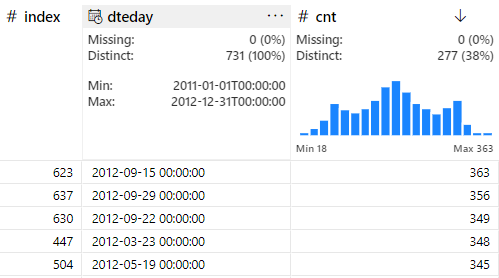
- Rata-rata pengguna harian terbanyak ada pada tanggal 15-09-2012 dengan 363 pengguna

### Jam

**Jam sibuk di hari kerja dan hari libur**

In [25]:
avg_user_hr_work = pd.pivot_table(df_hour, columns='hr', index='workingday', values=['cnt'], aggfunc='mean')
avg_user_hr_work = avg_user_hr_work.astype(int)
pd.set_option('display.max_columns', 24)
avg_user_hr_work

cnt                                                             \
hr          0   1   2   3  4   5    6    7    8    9    10   11   12   13   
workingday                                                                  
0           90  69  53  25  8   8   18   43  105  171  255  315  366  372   
1           36  16   8   4  5  24  102  290  477  241  135  158  200  198   

                                                             
hr           14   15   16   17   18   19   20   21   22  23  
workingday                                                   
0           364  358  352  323  281  231  174  142  116  85  
1           183  201  293  525  492  348  249  186  138  88

- Terdapat perbedaan jam sibuk di hari libur dan hari kerja
- Jam sibuk di hari libur berada di jam 12 hingga 17. Sedangkan jam sibuk di hari kerja ada di jam 8 dan jam 17 hingga 18
- Perbedaan jam sibuk ini mungkin disebabkan oleh perbedaan aktivitas saat hari kerja dan hari libur

**Rata-rata pengguna perjam**

In [26]:
avg_user_hr = pd.pivot_table(df_hour, columns='hr', values=['cnt', 'casual', 'registered'], aggfunc='mean')
avg_user_hr = avg_user_hr.astype(int)
pd.set_option('display.max_columns', 24)
avg_user_hr

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
casual,10,6,4,2,1,1,4,11,21,30,46,59,68,72,75,74,73,74,61,48,36,28,22,15
cnt,53,33,22,11,6,19,76,212,359,219,173,208,253,253,240,251,311,461,425,311,226,172,131,87
registered,43,26,18,9,5,18,71,201,337,188,127,148,185,181,165,176,238,387,364,262,189,144,109,72


- Rata-rata pengguna terbanyak ada di jam 17, 18, dan 8
- Pola rata-rata pengguna perjam ini memiliki kemiripan pola dengan pekerja kantoran (9 to 5)
- Diasumsikan bahwa rata-rata pengguna merupakan pekerja kantoran, di mana mereka berangkat jam 8 dan pulang jam 17
- Pengguna non-membership cenderung lebih sedikit dibandingkan pengguna membership
- Perubahan rata-rata pengguna non-membership di setiap jam tidak terlalu signifikan apabila dibandingkan dengan pengguna membership

**Rata-rata suhu tiap jam**

In [27]:
avg_temp_hr = df_hour.groupby(['hr'])['temp'].mean().reset_index()
avg_temp_hr['temp'] = avg_temp_hr['temp'] * 41
avg_temp_hr['temp'] = avg_temp_hr['temp'].round(2)
avg_temp_hr.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
hr,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.0,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00
temp,19.16,18.83,18.64,18.58,18.31,17.88,17.73,18.0,18.65,19.55,20.52,21.43,22.15,22.74,23.17,23.31,23.16,22.74,22.19,21.49,20.85,20.31,19.86,19.48


- Rata-rata suhu mulai mengalami peningkatan dari jam 6 hingga 18; mengalami penurunan dari jam 19 hingga 5

### Tahun

In [44]:
yearly_user = df_day.groupby(['yr'])['cnt'].sum().reset_index()
yearly_user

,yr,cnt
0,2011,1243103
1,2012,2049576


- Terdapat total 3,292,679 pengguna selama 2 tahun (2011 & 2012)
- Jumlah pengguna pada tahun 2012 mengalami kenaikan sebesar 64.9%

### Bulan

**Jumlah pengguna perbulan**

In [28]:
sum_user_month = pd.pivot_table(df_day, index='yr', columns='mnth', values='cnt', aggfunc='sum')
sum_user_month

mnth,1,2,3,4,5,6,7,8,9,10,11,12
yr,,,,,,,,,,,,
2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


- Pengguna terbanyak pada tahun 2011 ada di bulan 6
- Pengguna terbanyak pada tahun 2012 ada di bulan 9
- Pengguna terbanyak jika ditotal ada di bulan 8
- Terjadi peningkatan jumlah pengguna yang lumayan signifikan di tahun 2012 dengan rata-rata persentase peningkatan di angka 76.54%
- Peningkatan jumlah pengguna paling drastis ada di bulan 3 dengan persentase 157.43%

**Rata-rata pengguna perbulan**

In [29]:
df_day.groupby(['mnth'])['cnt'].mean().reset_index().astype(int).T

,0,1,2,3,4,5,6,7,8,9,10,11
mnth,1,2,3,4,5,6,7,8,9,10,11,12
cnt,2176,2655,3692,4484,5349,5772,5563,5664,5766,5199,4247,3403


- Rata-rata pengguna terbanyak secara keseluruhan ada di bulan 6 dengan 5.772 pengguna

### Musim

**Jumlah pengguna setiap musim**

In [30]:
sum_user_season = pd.pivot_table(df_day, index='yr', columns='season', values='cnt', aggfunc='sum')
sum_user_season = sum_user_season[['Winter', 'Spring', 'Summer', 'Fall']]
sum_user_season

season,Winter,Spring,Summer,Fall
yr,,,,
2011,150000,347316,419650,326137
2012,321348,571273,641479,515476


- Jumlah pengguna terbanyak di setiap tahun berada pada musim panas (Summer) dengan total 1.061.129 pengguna
- Peningkatan signifikan terjadi di musim dingin dengan persentase kenaikan sebesar 114.23%. Kenaikan ini dimulai pada awal tahun, pertengahan musim dingin

**Rata-rata pengguna setiap musim**

In [31]:
avg_user_season = pd.pivot_table(df_day, index='yr', columns='season', values='cnt', aggfunc='mean')
avg_user_season = np.floor(avg_user_season).astype(int)
avg_user_season = avg_user_season[['Winter', 'Spring', 'Summer', 'Fall']]
avg_user_season

season,Winter,Spring,Summer,Fall
yr,,,,
2011,1666,3775,4464,3664
2012,3531,6209,6824,5791


- Peningkatan rata-rata pengguna dari musim dingin ke musim gugur di tahun 2011 memiliki persentase peningkatan 42.28%
- Peningkatan rata-rata pengguna dari musim dingin ke musim gugur di tahun 2012 memiliki persentase peningkatan 23.54%
- Persentase kenaikan musim ke musim di tahun 2012 lebih rendah, tetapi peningkatan di tahun 2012 sangat signifikan

**Rata-rata suhu tiap musim**

In [32]:
avg_temp_season = df_hour.groupby(['season'])['temp'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index()
avg_temp_season['temp'] = avg_temp_season['temp'] * 41
avg_temp_season['temp'] = avg_temp_season['temp'].round(2)
avg_temp_season.T

,0,1,2,3
season,Winter,Spring,Summer,Fall
temp,12.27,22.33,28.96,17.35


- Rata-rata suhu tertinggi ada di musim panas dengan angka 28.96° C; Terendah di musim dingin dengan angka 12.27° C
- Rata-rata suhu meningkat dari musim dingin menuju musim panas, kemudian kembali menurun dari musim panas ke musim dingin

### Cuaca

**Rata-rata pengguna di setiap kondisi cuaca**

In [33]:
avg_user_weather = df_hour.groupby(['weathersit'])['cnt'].mean().reindex(['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Rain/Light Snow', 'Heavy Rain/Thunderstorm/Snowstorm']).reset_index()
avg_user_weather['cnt'] = avg_user_weather['cnt'].astype(int)
avg_user_weather

,weathersit,cnt
0,Clear/Partly Cloudy,204
1,Mist/Cloudy,175
2,Light Rain/Light Snow,111
3,Heavy Rain/Thunderstorm/Snowstorm,74


- Rata-rata pengguna terbanyak adalah ketika cuaca cerah atau sebagian berawan; paling sedikit ketika hujan deras atau hujan badai atau hujan salju
- Terjadi penurunan rata-rata pengguna seiring memburuknya cuaca

**Cuaca tersering di setiap musim**

In [34]:
frequent_weather = df_hour.groupby('season').agg({
    'weathersit': 'value_counts'
})
frequent_weather

weathersit
season weathersit                                   
Fall   Clear/Partly Cloudy                      2609
       Mist/Cloudy                              1248
       Light Rain/Light Snow                     375
Spring Clear/Partly Cloudy                      2859
       Mist/Cloudy                              1144
       Light Rain/Light Snow                     406
Summer Clear/Partly Cloudy                      3280
       Mist/Cloudy                               947
       Light Rain/Light Snow                     269
Winter Clear/Partly Cloudy                      2665
       Mist/Cloudy                              1205
       Light Rain/Light Snow                     369
       Heavy Rain/Thunderstorm/Snowstorm           3

- Hujan lebat/Hujan badai/Badai salju hanya terjadi sebanyak 3 kali dalam 2 tahun.

### Korelasi

Spearman Correlation


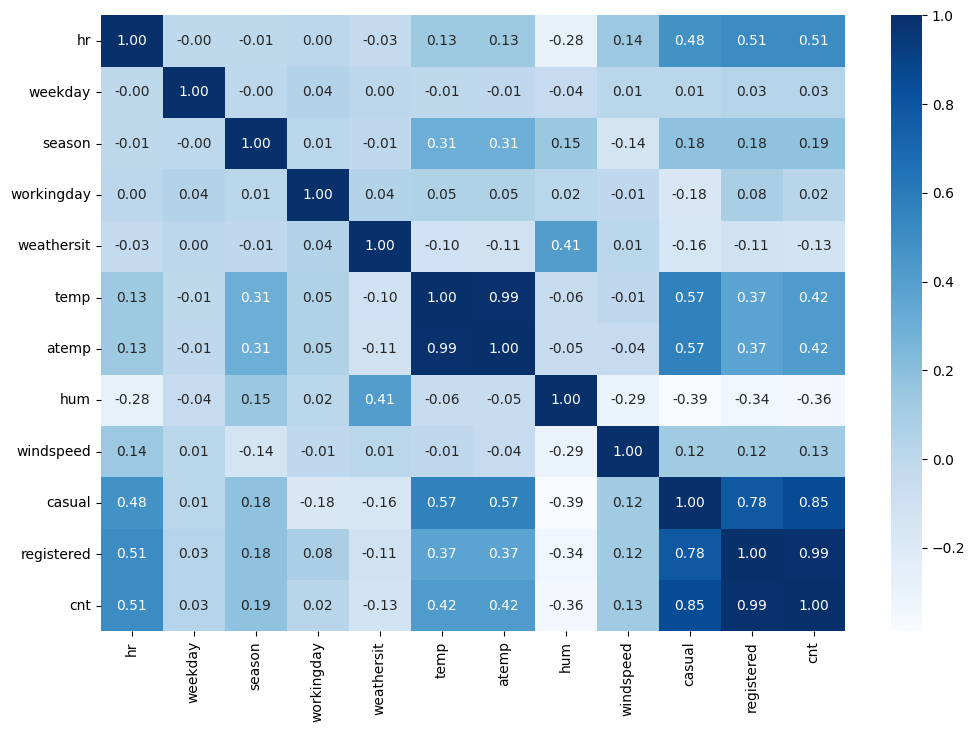

In [35]:
print('Spearman Correlation')
remap_weather = {
    'Clear/Partly Cloudy': 1,
    'Mist/Cloudy': 2,
    'Light Rain/Light Snow': 3,
    'Heavy Rain/Thunderstorm/Snowstorm': 4
}
remap_season = {
    'Winter': 1,
    'Spring': 2,
    'Summer': 3,
    'Fall': 4
}
remap_weekday = {
    'Sun': 0,
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6
}
df_hour_copy = df_hour.copy()
df_hour_copy['weathersit'] = df_hour_copy['weathersit'].map(remap_weather)
df_hour_copy['season'] = df_hour_copy['season'].map(remap_season)
df_hour_copy['weekday'] = df_hour_copy['weekday'].map(remap_weekday)

plt.figure(figsize=(12, 8))
sns.heatmap(df_hour_copy[['hr', 'weekday','season', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'] ].corr(method='spearman'), annot=True, fmt='.2f', cmap='Blues')
plt.show()

## Visualization & Explanatory Analysis

### Kapan peak season penggunaan sepeda?

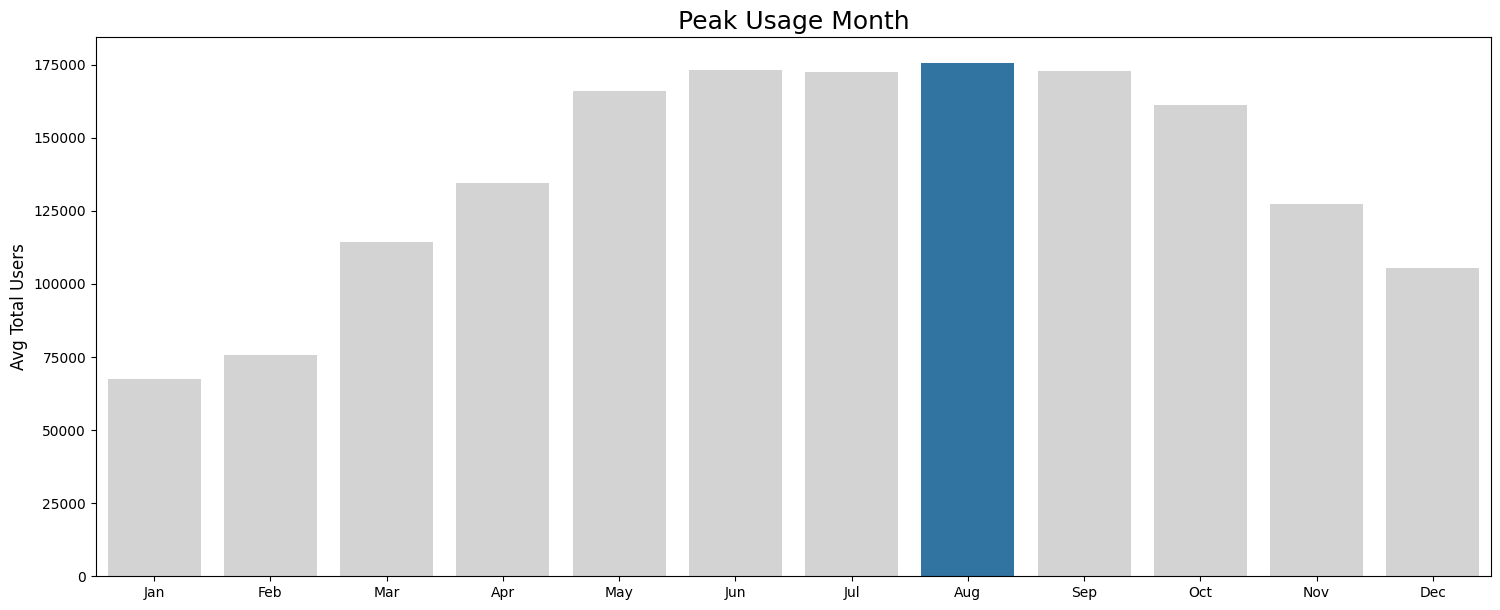

In [43]:
my_palette = ['#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#1F77B4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

rename_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
avg_user_month = df_day.groupby(['mnth']).agg({'cnt': 'sum'}).reset_index()
avg_user_month['mnth'] = avg_user_month['mnth'].map(rename_month)
avg_user_month['cnt'] = (avg_user_month['cnt']/2).astype(int)

plt.figure(figsize=(18, 7))
avg_user_month = avg_user_month.rename(columns=rename_month)
sns.barplot(data=avg_user_month, x='mnth', y='cnt', palette=my_palette, errorbar=None)
plt.title('Peak Usage Month', fontsize=18)
plt.xlabel('')
plt.ylabel('Avg Total Users', fontsize=12)
plt.show()

Peak usage month atau bulan dengan jumlah pengguna terbanyak terjadi di bulan Agustus. Dengan rata-rata jumlah pengguna dalam 2 tahun melebihi angka 175.000, berbeda tipis dengan bulan Juni. Hal ini berdasarkan data jumlah pengguna setiap bulan selama 2 tahun (2011 & 2012).

### Kapan hari yang paling sibuk?

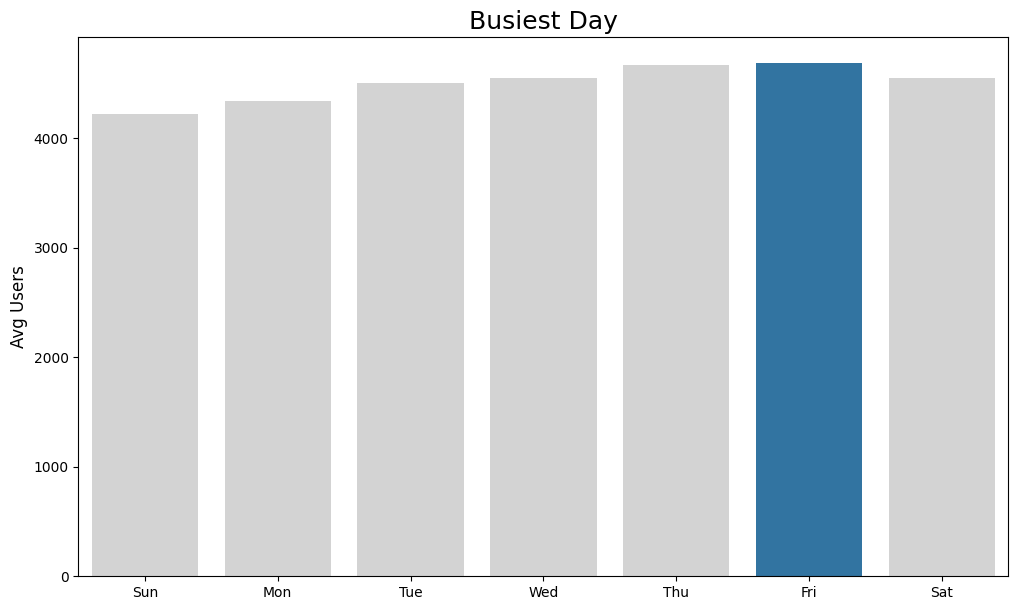

In [37]:
my_palette = ['#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#1F77B4', '#D3D3D3']

avg_user_days = df_day.groupby(['weekday']).agg({'cnt': 'mean'}).reset_index()
avg_user_days['cnt'] = avg_user_days['cnt'].astype(int)
avg_user_days

plt.figure(figsize=(12, 7))
sns.barplot(data=avg_user_days, x='weekday', y='cnt', palette=my_palette, errorbar=None, order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.title('Busiest Day', fontsize=18)
plt.xlabel('')
plt.ylabel('Avg Users', fontsize=12)
plt.show()

Hari Jumat menjadi hari tersibuk dengan angka rata-rata lebih dari 4000 pengguna, berbeda tipis dengan hari Kamis. Hal ini berdasarkan data rata-rata pengguna setiap hari dalam 2 tahun (2011 & 2012).

### Pada tanggal berapa penggunaan sepeda mencapai puncaknya?

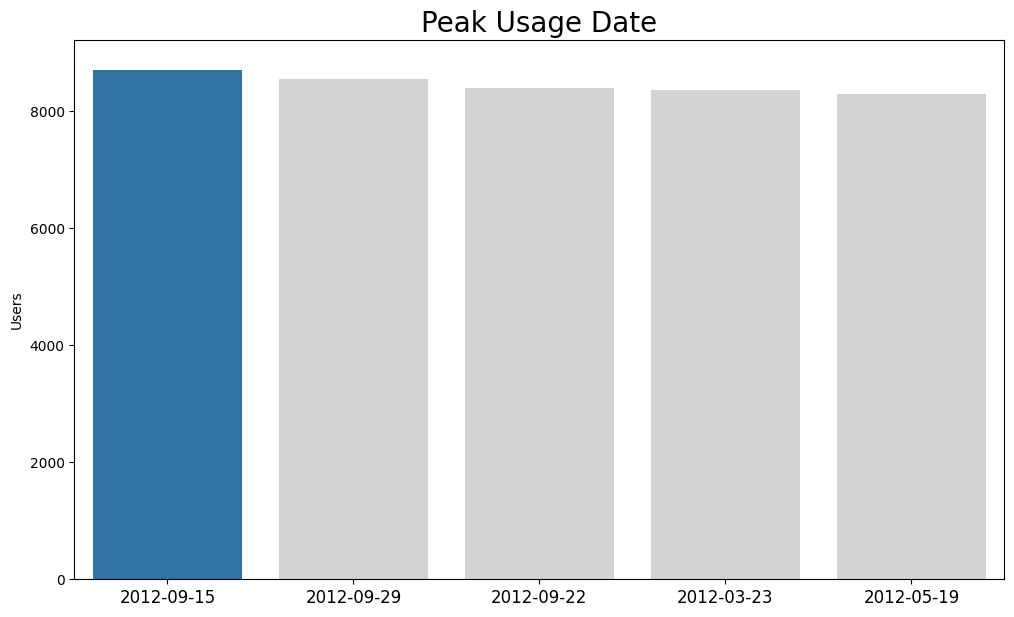

In [38]:
sum_user_day = df_day.groupby(['dteday'])['cnt'].sum().reset_index()
sum_user_day['cnt'] = sum_user_day['cnt'].astype(int)
sum_user_day['dteday'] = pd.to_datetime(sum_user_day['dteday']).dt.strftime('%Y-%m-%d')
sum_user_day.sort_values('cnt', ascending=False, inplace=True)
sum_user_day.reset_index()
    
my_palette = ['#1F77B4', "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(12, 7))
sns.barplot(x="dteday", y="cnt", data=sum_user_day.head(5), palette=my_palette)
plt.ylabel('Users')
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.title("Peak Usage Date", loc="center", fontsize=20)
plt.ylim(0, sum_user_day['cnt'].max() + 500)
    
plt.show()

Puncak jumlah penggua terjadi pada hari Sabtu, 15-09-2012 dengan lebih dari 8.500 pengguna.

### Kapan jam penyewaan tersibuk di setiap harinya?

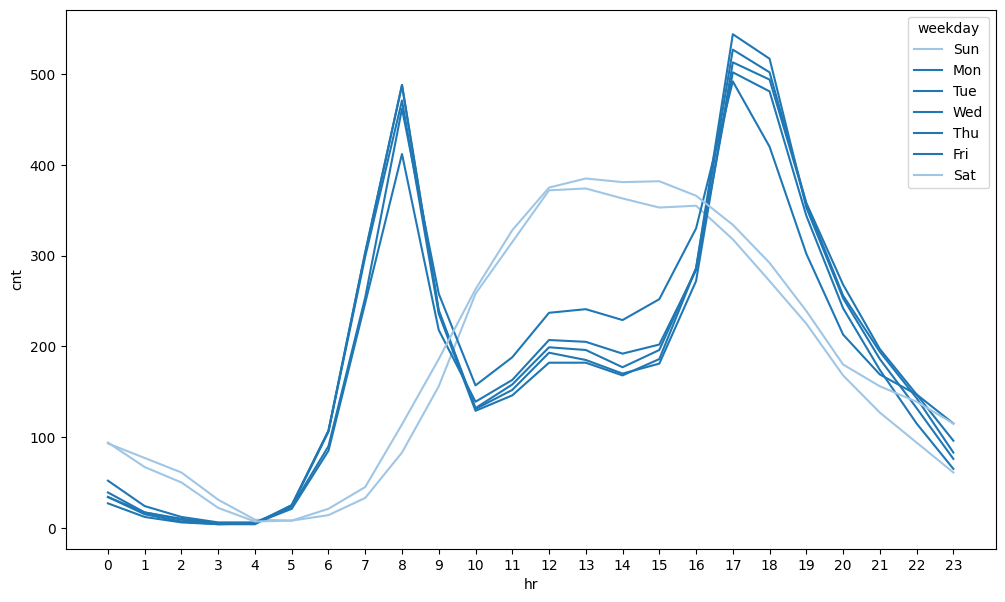

In [39]:
my_palette = ['#A0C6E5', '#1F77B4', '#1F77B4', '#1F77B4', '#1F77B4', '#1F77B4', '#A0C6E5']
weekday_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

avg_hr_days = df_hour.groupby(['hr', 'weekday']).agg({'cnt': 'mean'}).reset_index()
avg_hr_days['cnt'] = avg_hr_days['cnt'].astype(int)

plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_hr_days, x='hr', y='cnt', hue='weekday', errorbar=None, palette=my_palette, hue_order=weekday_order)
plt.xticks(range(0, 24))
plt.show()

Jam sibuk pada hari biasa (Senin s.d. Jumat) memiliki pola yang sama. Jam hari biasa berada pada jam berangkat kerja dan jam pulang kerja, yaitu jam 8 dan jam 17 hingga jam 18. Sedangkan jam sibuk pada akhir pekan berada pada rentang jam 12 hingga jam 16.

### Kapan musim yang paling banyak pengguna?

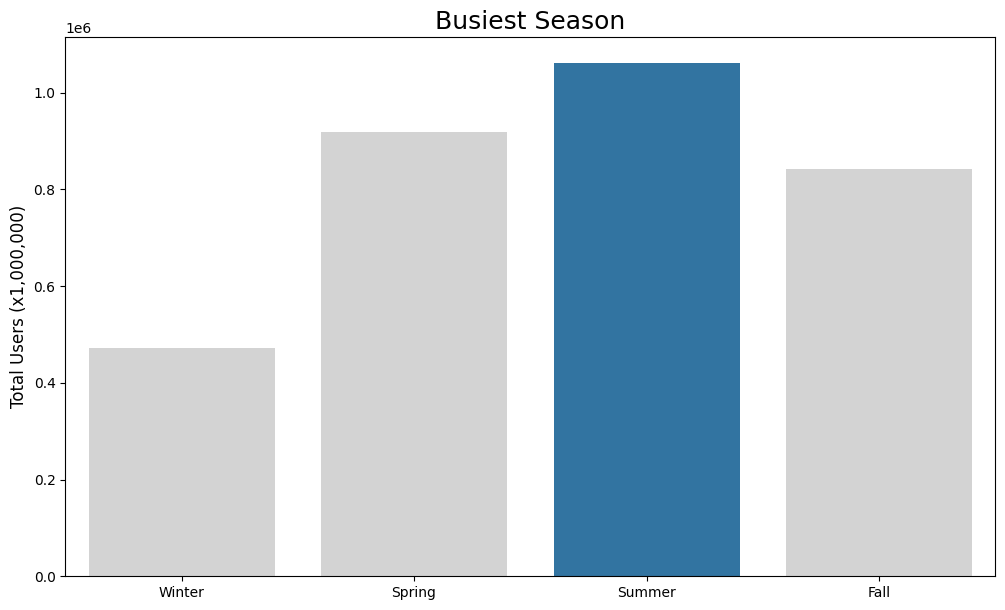

In [40]:
my_palette = ['#D3D3D3', '#D3D3D3', '#1F77B4', '#D3D3D3']

sum_user_season = df_day.groupby(['season']).agg({'cnt': 'sum'}).reset_index()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(12, 7))
sns.barplot(data=sum_user_season, x='season', y='cnt', palette=my_palette, errorbar=None, order=season_order)
plt.title('Busiest Season', fontsize=18)
plt.xlabel('')
plt.ylabel('Total Users (x1,000,000)', fontsize=12)
plt.show()

Musim panas menjadi musim tersibuk dengan lebih dari 1.000.000 pengguna sepeda

### Apakah terdapat perbedaan jam sibuk di setiap musim?

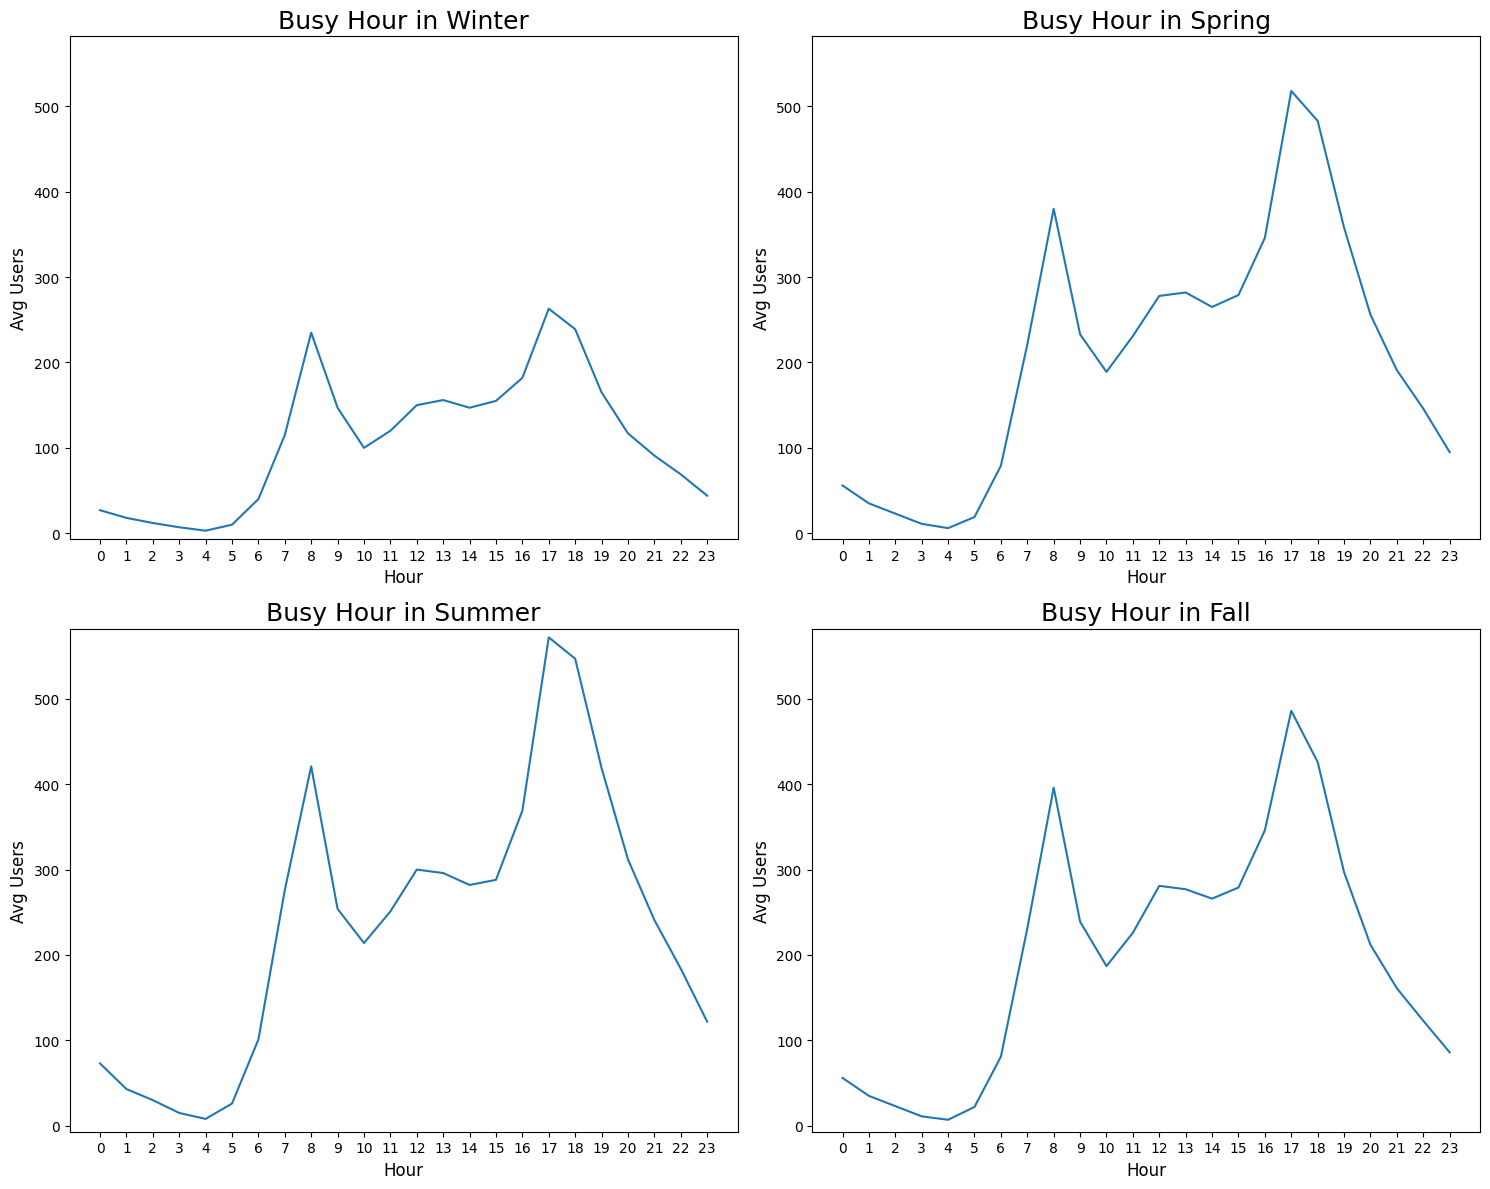

In [41]:
avg_user_season = df_hour.groupby(['hr', 'season']).agg({'cnt': 'mean'}).reset_index()
avg_user_season['cnt'] = avg_user_season['cnt'].astype(int)

ylim_max = avg_user_season['cnt'].max() + 10
ylim_min = avg_user_season['cnt'].min() - 10

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Winter
sns.lineplot(data=avg_user_season[avg_user_season['season'] == 'Winter'], x='hr', y='cnt', errorbar=None, ax=axes[0, 0], color='#1F77B4')
axes[0, 0].set_title('Busy Hour in Winter', fontsize=18)
axes[0, 0].set_xlabel('Hour', fontsize=12)
axes[0, 0].set_ylabel('Avg Users', fontsize=12)
axes[0, 0].set_xticks(range(0, 24))
axes[0, 0].set_ylim(ylim_min, ylim_max)

# Spring
sns.lineplot(data=avg_user_season[avg_user_season['season'] == 'Spring'], x='hr', y='cnt', errorbar=None, ax=axes[0, 1], color='#1F77B4')
axes[0, 1].set_title('Busy Hour in Spring', fontsize=18)
axes[0, 1].set_xlabel('Hour', fontsize=12)
axes[0, 1].set_ylabel('Avg Users', fontsize=12)
axes[0, 1].set_xticks(range(0, 24))
axes[0, 1].set_ylim(ylim_min, ylim_max)

# Summer
sns.lineplot(data=avg_user_season[avg_user_season['season'] == 'Summer'], x='hr', y='cnt', errorbar=None, ax=axes[1, 0], color='#1F77B4')
axes[1, 0].set_title('Busy Hour in Summer', fontsize=18)
axes[1, 0].set_xlabel('Hour', fontsize=12)
axes[1, 0].set_ylabel('Avg Users', fontsize=12)
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].set_ylim(ylim_min, ylim_max)

# Fall
sns.lineplot(data=avg_user_season[avg_user_season['season'] == 'Fall'], x='hr', y='cnt', errorbar=None, ax=axes[1, 1], color='#1F77B4')
axes[1, 1].set_title('Busy Hour in Fall', fontsize=18)
axes[1, 1].set_xlabel('Hour', fontsize=12)
axes[1, 1].set_ylabel('Avg Users', fontsize=12)
axes[1, 1].set_xticks(range(0, 24))
axes[1, 1].set_ylim(ylim_min, ylim_max)

plt.tight_layout()
plt.show()

Tidak terdapat perbedaan jam sibuk pada setiam musim. Semua musim memiliki pola jam sibuk yang sama, tetapi sedikit berbeda pada musim dingin. Musim dingin memiliki rata-rata suhu yang lebih rendah sehingga orang memilih untuk mengurangi aktivitas di luar ruangan.

### Apa perbedaan kebiasaan pengguna membership dan non-membership di hari kerja/libur?

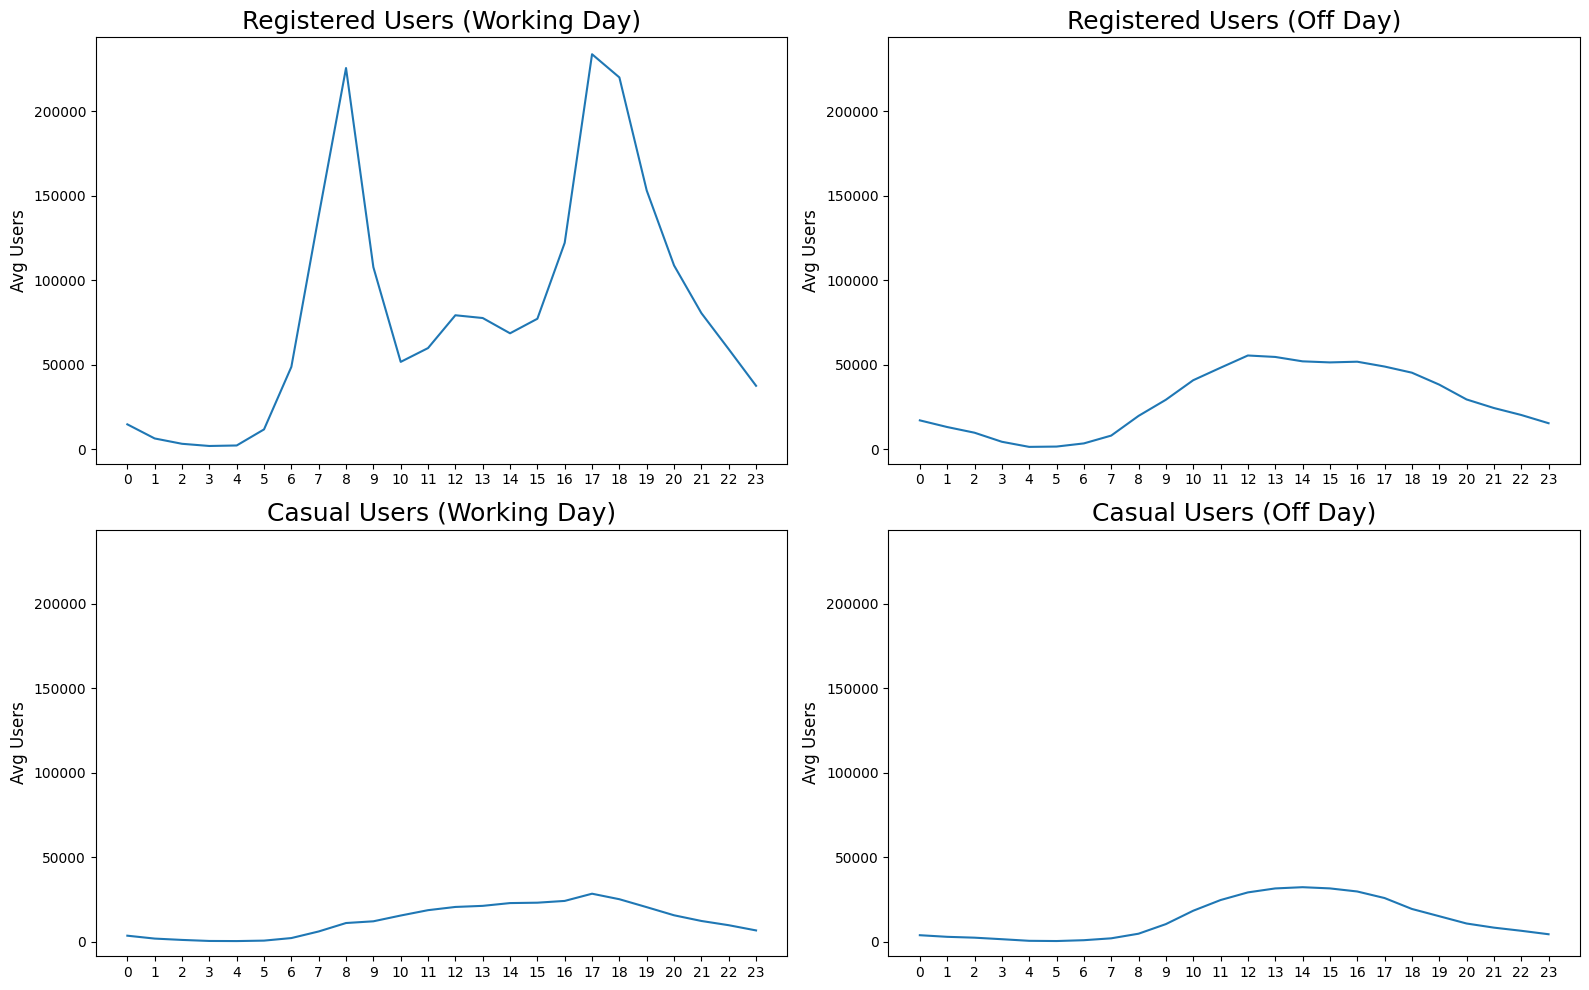

In [42]:
avg_user_reg = df_hour.groupby(['workingday', 'hr'])['registered'].sum().reset_index()
avg_user_cas = df_hour.groupby(['workingday', 'hr'])['casual'].sum().reset_index()

y_min_reg = avg_user_reg['registered'].min() - 10000; y_max_reg = avg_user_reg['registered'].max() + 10000
y_min_cas = avg_user_cas['casual'].min() - 10000; y_max_cas = avg_user_cas['casual'].max() + 10000

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.lineplot(data=avg_user_reg[avg_user_reg['workingday'] == 1], x='hr', y='registered', color='#1F77B4', errorbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Registered Users (Working Day)', fontsize=18)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Avg Users', fontsize=12)
axes[0, 0].set_xticks(range(0, 24))
axes[0, 0].set_ylim(y_min_reg, y_max_reg)

sns.lineplot(data=avg_user_reg[avg_user_reg['workingday'] == 0], x='hr', y='registered', color='#1F77B4', errorbar=None, ax=axes[0, 1])
axes[0, 1].set_title('Registered Users (Off Day)', fontsize=18)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Avg Users', fontsize=12)
axes[0, 1].set_xticks(range(0, 24))
axes[0, 1].set_ylim(y_min_reg, y_max_reg)

sns.lineplot(data=avg_user_cas[avg_user_cas['workingday'] == 1], x='hr', y='casual', color='#1F77B4', errorbar=None, ax=axes[1, 0])
axes[1, 0].set_title('Casual Users (Working Day)', fontsize=18)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Avg Users', fontsize=12)
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].set_ylim(y_min_reg, y_max_reg)

sns.lineplot(data=avg_user_cas[avg_user_cas['workingday'] == 0], x='hr', y='casual', color='#1F77B4', errorbar=None, ax=axes[1, 1])
axes[1, 1].set_title('Casual Users (Off Day)', fontsize=18)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Avg Users', fontsize=12)
axes[1, 1].set_xticks(range(0, 24))
axes[1, 1].set_ylim(y_min_reg, y_max_reg)

plt.tight_layout()
plt.show()

Pola pengguna non-membership pada hari kerja memiliki puncak jam sibuk (peak hour) di jam 17, hal ini mirip dengan pola pengguna membership. Akan tetapi terdapat sedikit perbedaan, yaitu walaupun peak hour pengguna non-membership berada di jam 17, rata-rata pengguna mengalami peningkatan secara konsisten dari jam 6 hingga jam 17. Pola tersebut berbeda dengan pola pengguna membership yang menurun drastis setelah jam 8.

## Conclusion

**Pertanyaan 1**

Peak usage month atau bulan dengan jumlah pengguna terbanyak terjadi di bulan Agustus. Dengan rata-rata jumlah pengguna dalam 2 tahun melebihi angka 175.000, berbeda tipis dengan bulan Juni. Hal ini berdasarkan data jumlah pengguna setiap bulan selama 2 tahun (2011 & 2012).

**Pertanyaan 2**

Hari Jumat menjadi hari tersibuk dengan angka rata-rata lebih dari 4000 pengguna, berbeda tipis dengan hari Kamis. Hal ini berdasarkan data rata-rata pengguna setiap hari dalam 2 tahun (2011 & 2012).

**Pertanyaan 3**

Jam sibuk pada hari biasa (Senin s.d. Jumat) memiliki pola yang sama. Jam hari biasa berada pada jam berangkat kerja dan jam pulang kerja, yaitu jam 8 dan jam 17 hingga jam 18. Sedangkan jam sibuk pada akhir pekan berada pada rentang jam 12 hingga jam 16. Dari pola ini kita bisa mengasumsikan bahwa sebagian besar pengguna sepeda menikmati hari liburnya mulai siang hingga sore hari. Pola ini lebih dipengaruhi oleh status hari kerja/hari libur daripada harinya itu sendiri. Hal ini dapat diperjelas melalui visualisasi dari pertanyaan 6.

**Pertanyaan 4**

Musim panas menjadi musim tersibuk dengan jumlah pengguna terbanyak di angka lebih dari 1.000.000 pengguna. Hal ini dapat diperjelas oleh visualisasi dari pertanyaan 1 di mana rata-rata pengguna terbanyak ada di bulan Juni hingga September yang mana merupakan bulan awal dan berakhirnya musim panas.

**Pertanyaan 5**

Tidak terdapat perbedaan jam sibuk pada setiam musim. Semua musim memiliki pola jam sibuk yang sama, tetapi sedikit berbeda pada musim dingin. Musim dingin memiliki rata-rata suhu yang lebih rendah sehingga orang memilih untuk mengurangi aktivitas di luar ruangan.

**Pertanyaan 6**

Pola pengguna membership dan non-membership memiliki perbedaan yang sangat signifikan, terutama dari rata-rata penggunanya. Pengguna non-membership pada hari kerja hampir mirip dengan hari libur. Satu hal yang sama antara pola pengguna membership dan non-membership pada hari kerja adalah jam sibuk (peak hour) terjadi di jam 17. Seperti yang kita ketahui, bahwa terdapat 21 hari libur di hari biasa (Senin-Jumat) dan rata-rata pengguna pada hari libur memang jauh lebih sedikit apabila dibandingkan dengan hari kerja sehingga tidak mempengaruhi perubahan pola pengguna pada hari biasa.